In [75]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
data = pickle.load(open('../src/data/chartmetric.pickle', 'rb'))

In [11]:
data = pd.DataFrame(data)

In [22]:
lyric = pickle.load(open('../data/processed/lyric_full.pickle', 'rb'))

In [25]:
merged = pd.merge(lyric, data, left_on=['artist','song'], right_on=['artist','song_name'])

In [26]:
merged.head()

,artist,song,year,lyric,song_name,genre
0,A Band of Bitches,Guerra Nuclear,2012.0,Y tiraste las bombas y rompiste el alcohol \nY...,Guerra Nuclear,None
1,A Band of Bitches,Guerra Nuclear,2012.0,Y tiraste las bombas y rompiste el alcohol \nY...,Guerra Nuclear,"Pop Latino,Music,Latino,Rock y Alternativo"
2,A Band of Bitches,A Band of Bitches,2012.0,A band of bitches stole my car\r\nA band of bi...,A Band of Bitches,None
3,A Band of Bitches,Noreste Caliente,2012.0,None,Noreste Caliente,"Pop Latino,Music,Latino"
4,A Band of Bitches,Noreste Caliente,2012.0,None,Noreste Caliente,"Alternative,Music,Pop Latino,Music,Latino,Rock..."


In [35]:
is_genre_null = merged.genre.isnull()
is_lyric_null = merged.lyric.isnull()

merged = merged[~is_genre_null & ~is_lyric_null]

In [36]:
merged.shape

(374242, 6)

In [37]:
merged.head()

,artist,song,year,lyric,song_name,genre
1,A Band of Bitches,Guerra Nuclear,2012.0,Y tiraste las bombas y rompiste el alcohol \nY...,Guerra Nuclear,"Pop Latino,Music,Latino,Rock y Alternativo"
7,A Boy and His Kite,Cover Your Tracks,2012.0,"Heart, cover your tracks\nThe blood that you s...",Cover Your Tracks,"Alternative,Music"
8,A Breach of Silence,Falling Away,2017.0,We are bringing the system down. \nLight the f...,Falling Away,"Metal,Music,Rock"
20,A Breach of Silence,T.P.N.E.,2014.0,TPNE the party never ends! TPNE the party neve...,T.P.N.E.,"Metal,Music,Rock"
21,A Breach of Silence,The Darkest Road,2014.0,It's not enough to know I'm breathing.\nI've g...,The Darkest Road,"Metal,Music,Rock"


In [43]:
merged.genre = merged.genre.str.split(',')

In [46]:
merged_long = merged.explode('genre')

In [51]:
merged_long.genre.value_counts()[:20]

Music                318067
Rock                 150353
Pop                  108027
Alternative           51448
Jazz                  50831
Hip-Hop/Rap           41703
Country               37578
R&B/Soul              37472
Música                36836
Adult Alternative     25096
Pop/Rock              23930
Singer/Songwriter     23870
Dance                 21173
Metal                 20409
Latino                19477
Vocal                 18534
Blues                 18285
Electronic            16200
Hard Rock             15242
Musik                 14812
Name: genre, dtype: int64

In [68]:
genre_set = ['Rock', 'Pop','Jazz', 'Hip-Hop/Rap', 'Country', 'R&B/Soul', 'Electronic']

test = merged_long[merged_long.genre.isin(genre_set)]

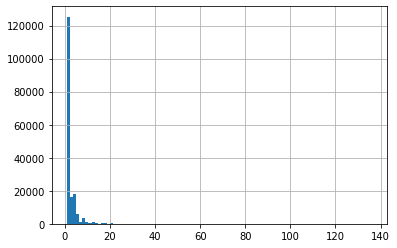

In [78]:
genre_counts = test.groupby(['artist','song']).genre.count()

genre_counts.hist(bins=100)

In [79]:
genre_counts.value_counts()

1      75419
2      49920
3      15947
4      14961
6       6084
       ...  
132        1
83         1
41         1
90         1
96         1
Name: genre, Length: 73, dtype: int64